In [ ]:
import os
import zipfile
import urllib.request
import warnings
warnings.filterwarnings("ignore")
url = "https://github.com/fizyr/keras-retinanet/archive/0.5.1.zip"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

('./0.5.1.zip', <http.client.HTTPMessage at 0x7f568b146a58>)

In [ ]:
zip_ref = zipfile.ZipFile('./0.5.1.zip', 'r')
for name in zip_ref.namelist():
 zip_ref.extract(name, './')
zip_ref.close()

In [ ]:
os.chdir('./keras-retinanet-0.5.1')
!python setup.py build_ext --inplace
!pip install .

In [ ]:
os.chdir('../')
url = "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

('./resnet50_coco_best_v2.1.0.h5', <http.client.HTTPMessage at 0x7f568a505438>)

In [ ]:
import os
import numpy as np
from collections import defaultdict
import keras
from keras_retinanet import models
from keras_retinanet.utils.image import (read_image_bgr,
 preprocess_image, resize_image)
from keras_retinanet.utils.visualization import (draw_box,
 draw_caption)
from keras_retinanet.utils.colors import label_color
import matplotlib.pyplot as plt
%matplotlib inline
model_path = os.path.join('.',
 'resnet50_coco_best_v2.1.0.h5')
model = models.load_model(model_path,
 backbone_name='resnet50')
labels_to_names = defaultdict(lambda: 'object',
 {0: 'person', 1: 'bicycle', 2: 'car',
 3: 'motorcycle', 4: 'airplane', 5: 'bus',
 6: 'train', 7: 'truck', 8: 'boat',
 9: 'traffic light', 10: 'fire hydrant',
 11: 'stop sign', 12: 'parking meter',
 25: 'umbrella'})

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/commons/\
thumb/f/f8/Woman_with_blue_parasol_at_intersection.png/\
640px-Woman_with_blue_parasol_at_intersection.png"
urllib.request.urlretrieve(url, './'+url.split('/')[-1])

('./640px-Woman_with_blue_parasol_at_intersection.png',
 <http.client.HTTPMessage at 0x7f568a505198>)

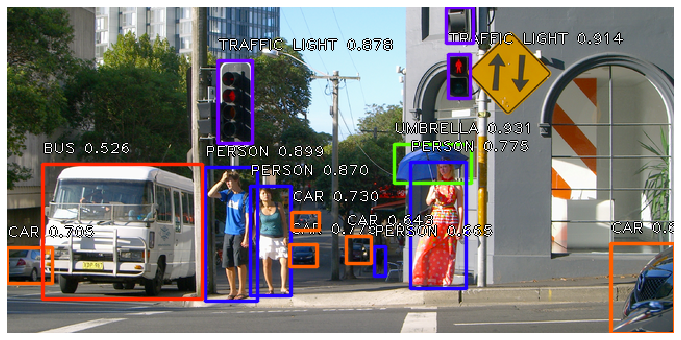

In [ ]:
image = read_image_bgr('640px-Woman_with_blue_parasol_at_intersection.png')
draw = image.copy()
draw[:,:,0], draw[:,:,2] = image[:,:,2], image[:,:,0]
image = preprocess_image(image)
image, scale = resize_image(image)
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes /= scale
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score > 0.5:
         color = label_color(label)
         b = box.astype(int)
         draw_box(draw, b, color=color)
         caption = "{} {:.3f}".format(labels_to_names[label],score)
         draw_caption(draw, b, caption.upper())

plt.figure(figsize=(12, 6))
plt.axis('off')
plt.imshow(draw)
plt.show()